# Clothes Classification with Neural Networks

Student: Alessandro Valente 

Id: 1234429

In this notebook we are going to explore the Neural Networks for image classification. We are going to use the same dataset of the SVM notebook: Fashion MNIST (https://pravarmahajan.github.io/fashion/), a dataset of small images of clothes and accessories.

The dataset labels are the following:

| Label | Description |
| --- | --- |
| 0 | T-shirt/top |
| 1 | Trouser |
| 2 | Pullover |
| 3 | Dress |
| 4 | Coat |
| 5 | Sandal |
| 6 | Shirt |
| 7 | Sneaker |
| 8 | Bag |
| 9 | Ankle boot |

In [1]:
#load the required packages and check Scikit-learn version

%matplotlib inline  

import pandas as pd
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

import sklearn
print ('scikit-learn version: ', sklearn.__version__)
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

scikit-learn version:  0.20.3


In [2]:
# helper function to load Fashion MNIST dataset from disk
def load_mnist(path, kind='train'):
    import os
    import gzip
    import numpy as np
    labels_path = os.path.join(path, '%s-labels-idx1-ubyte.gz' % kind)
    images_path = os.path.join(path, '%s-images-idx3-ubyte.gz' % kind)
    with gzip.open(labels_path, 'rb') as lbpath:
        labels = np.frombuffer(lbpath.read(), dtype=np.uint8,offset=8)
    with gzip.open(images_path, 'rb') as imgpath:
        images = np.frombuffer(imgpath.read(), dtype=np.uint8,offset=16).reshape(len(labels), 784)
    return images, labels

# TODO 
Place a seed for the random generator (you can use your "numero di matricola"). Try to change the seed to see the impact of the randomization.

In [3]:
ID = 1234429
np.random.seed(ID)

In [4]:
#load the MNIST dataset and let's normalize the features so that each value is in [0,1]
X, y = load_mnist("data")
print("Number of samples in the MNIST dataset:", X.shape[0])
# rescale the data
X = X / 255.0

Number of samples in the MNIST dataset: 60000


Now split into training and test. We start with a small training set of 600 samples to reduce computation time. Make sure that each label is present at least 10 times
in training frequencies.

In [5]:
#random permute the data and split into training and test taking the first 600
#data samples as training and the rests as test
permutation = np.random.permutation(X.shape[0])

X = X[permutation]
y = y[permutation]

m_training = 600

X_train, X_test = X[:m_training], X[m_training:]
y_train, y_test = y[:m_training], y[m_training:]

labels, freqs = np.unique(y_train, return_counts=True)
print("Labels in training dataset: ", labels)
print("Frequencies in training dataset: ", freqs)


Labels in training dataset:  [0 1 2 3 4 5 6 7 8 9]
Frequencies in training dataset:  [63 62 53 67 61 56 60 64 48 66]


In [6]:
#function for plotting a image and printing the corresponding label
def plot_input(X_matrix, labels, index):
    print("INPUT:")
    plt.imshow(
        X_matrix[index].reshape(28,28),
        cmap          = plt.cm.gray_r,
        interpolation = "nearest"
    )
    plt.show()
    print("LABEL: %i"%labels[index])
    return

INPUT:


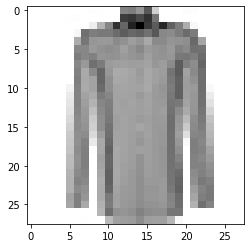

LABEL: 6
INPUT:


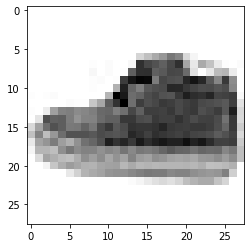

LABEL: 7
INPUT:


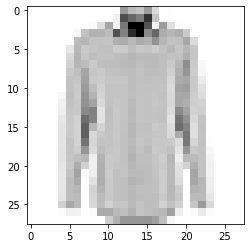

LABEL: 6


In [7]:
#let's try the plotting function
plot_input(X_train,y_train,10)
plot_input(X_test,y_test,100)
plot_input(X_test,y_test,10000)

## TO DO 1

Now use a feed-forward Neural Network for prediction. Use the multi-layer perceptron classifier, with the following parameters: max_iter=300, alpha=1e-4, solver='sgd', tol=1e-4, learning_rate_init=.1, random_state=ID (this last parameter ensures the run is the same even if you run it more than once). The alpha parameter is the regularization term.

Then, using the default activation function, pick four or five architectures to consider, with different numbers of hidden layers and different sizes. It is not necessary to create huge neural networks, you can limit to 3 layers and, for each layer, its maximum size can be of 100. Evaluate the architectures you chose using GridSearchCV with cv=5.

You can reduce the number of iterations if the running time is too long on your computer.


In [8]:
# these are sample values but feel free to change them as you like, try to experiment with different sizes!!
parameters = {'hidden_layer_sizes': [(10,), (20,), (40,), (60,), (80,), (100,),
                                     (40,20,), (50,30,), (40,20,), (70,60,), (100,90,), (100,100), 
                                     (40,30,20), (60,50,40), (80,70,60), (100,90,80), (100,100,100)
                                    ]}

mlp = MLPClassifier(max_iter=300, alpha=1e-4, solver='sgd',
                    tol=1e-4, random_state=ID,
                    learning_rate_init=.1)

NNclasf = GridSearchCV (mlp, parameters, cv=5, return_train_score=True)
NNclasf.fit(X_train, y_train)
NNResult = pd.DataFrame (NNclasf.cv_results_)

print ('RESULTS FOR NN\n')
print("Best parameters set found:")
print(NNclasf.best_params_)
print("Score with best parameters:")
print(NNclasf.best_score_)
print("\nAll scores on the grid:")
print(NNResult[['params', 'mean_test_score', 'mean_train_score']])


/home/alessandro/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


RESULTS FOR NN

Best parameters set found:
{'hidden_layer_sizes': (100,)}
Score with best parameters:
0.8033333333333333

All scores on the grid:
                                     params  mean_test_score  mean_train_score
0             {'hidden_layer_sizes': (10,)}         0.773333          1.000000
1             {'hidden_layer_sizes': (20,)}         0.768333          0.988342
2             {'hidden_layer_sizes': (40,)}         0.785000          1.000000
3             {'hidden_layer_sizes': (60,)}         0.791667          1.000000
4             {'hidden_layer_sizes': (80,)}         0.795000          1.000000
5            {'hidden_layer_sizes': (100,)}         0.803333          1.000000
6          {'hidden_layer_sizes': (40, 20)}         0.775000          0.956929
7          {'hidden_layer_sizes': (50, 30)}         0.755000          0.926912
8          {'hidden_layer_sizes': (40, 20)}         0.775000          0.956929
9          {'hidden_layer_sizes': (70, 60)}         0.775000    

### TO DO 2

Now try also different batch sizes, while keeping the best NN architecture you have found above. Remember that the batch size was previously set to the default value, i.e., min(200, n_samples). 
Recall that a batch size of 1 corresponds to baseline SGD, while using all the 480 training samples (there are 600 samples but in cross validation with 5 folders we use 1/5 of them for validation at each round) corresponds to standard GD and using a different mini-batch size lies in the middle between the two extreme cases.

In [9]:
# these are sample values corresponding to baseline SGD, a reasonable mini-batch size and standard GD
# again feel free to change them as you like, try to experiment with different batch sizes!!
parameters = {'batch_size': [x*20 for x in range (1,25)]}

# need to specify that you would like to use the standard k-fold split otherwise sklearn create splits of different sizes
kf = sklearn.model_selection.KFold(n_splits=5)
mlp_bl = MLPClassifier(hidden_layer_sizes=NNclasf.best_params_['hidden_layer_sizes'], 
                       max_iter=300, alpha=1e-4, solver='sgd', 
                       tol=1e-4, random_state=ID,
                       learning_rate_init=.1)
# recall to use cv=kf in GridSearchCV parameters to use the k-fold subdivision seen in the lectures

NNclasf_bestlayer = GridSearchCV (mlp_bl, parameters, cv=kf, return_train_score=True )
NNclasf_bestlayer.fit(X_train, y_train)
NNResult_bestlayer = pd.DataFrame (NNclasf_bestlayer.cv_results_)

print ('RESULTS FOR NN best layer\n')

print("Best parameters set found:")
print(NNclasf_bestlayer.best_params_)
print("Score with best parameters:")
print(NNclasf_bestlayer.best_score_)
print("\nAll scores on the grid:")
print(NNResult_bestlayer[['params', 'mean_test_score', 'mean_train_score']])

RESULTS FOR NN best layer

Best parameters set found:
{'batch_size': 200}
Score with best parameters:
0.8116666666666666

All scores on the grid:
                 params  mean_test_score  mean_train_score
0    {'batch_size': 20}         0.701667          0.869583
1    {'batch_size': 40}         0.793333          1.000000
2    {'batch_size': 60}         0.796667          1.000000
3    {'batch_size': 80}         0.800000          1.000000
4   {'batch_size': 100}         0.806667          1.000000
5   {'batch_size': 120}         0.805000          1.000000
6   {'batch_size': 140}         0.810000          1.000000
7   {'batch_size': 160}         0.806667          1.000000
8   {'batch_size': 180}         0.806667          1.000000
9   {'batch_size': 200}         0.811667          1.000000
10  {'batch_size': 220}         0.805000          1.000000
11  {'batch_size': 240}         0.806667          1.000000
12  {'batch_size': 260}         0.805000          1.000000
13  {'batch_size': 280}     

### QUESTION 1

What do you observe for different architectures and batch sizes? How do the number of layers and their sizes affect the performances? What do you observe for different batch sizes, in particular what happens to the training convergence for different batch sizes (notice that the algorithm could not converge for some batch sizes)?

## [ANSWER TO QUESTION 1]

I observe that increasing the number of layers in this case does not improve the estimation on the contrary the best score is obtained with only one layer, this is probably due to the dimension of the data set and its type, not being too complicated using too many layers may overfit the training data.
As expected with a bigger layer size the score increases as well. The two "extreme" cases for the batch size are the ones with the lowest score while the default option (200) is the one with the best score as i would expect even thou is possible to argue that the score with 200 and 480 is similar but in the 200 case the NN is probably overfitting since it's training score is 1.

### TO DO 3

Now try also to use different learning rates, while keeping the best NN architecture and batch size you have found above. Plot the learning curves (i.e., the variation of the loss over the steps, you can get it from the loss_curve_ object of sklearn) for the different values of the learning rate . 

/home/alessandro/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/alessandro/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


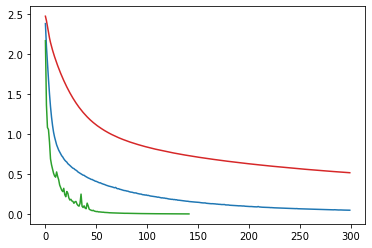

RESULTS FOR NN best batch size

Best parameters set found:
0.1
Score with best parameters:
0.7802188552188553
all scores
{0.001: 0.7586363636363637, 0.01: 0.7738720538720538, 0.1: 0.7802188552188553}


In [10]:
%matplotlib inline

lr_list = [10**exp for exp in range(-3,0)]
color=['tab:red', 'tab:blue', 'tab:green']
score={}
for i in range(3):
        mlp_bb = MLPClassifier(hidden_layer_sizes=NNclasf.best_params_['hidden_layer_sizes'], 
                       batch_size=NNclasf_bestlayer.best_params_['batch_size'],
                       max_iter=300, alpha=1e-4, solver='sgd', 
                       tol=1e-4, random_state=ID,
                       learning_rate_init=lr_list[i])
        mlp_bb.fit(X_train, y_train)
        k=lr_list[i]
        score[k]=mlp_bb.score(X_test, y_test)
        plt.plot(mlp_bb.loss_curve_, color=color[i])

plt.show()
print ('RESULTS FOR NN best batch size\n')

print("Best parameters set found:")
print(max(score))
print("Score with best parameters:")
print(score[max(score)])
print("all scores")
print(score)


### QUESTION 2

Comment about the learning curves (i.e. the variation of the loss over the steps). How does the curve changes for different learning rates in terms of stability and speed of convergence ?

## [ANSWER TO QUESTION 2]

It is clearly visible that the value 0.1 for the learing rate is the best mainly for two reasons: the 0.1 learing curve is the one that reach it's asyntotic value faster and furthermore the other 2 values are not able to make the algorithm converge with the iteration cap setted; they will probably converge to a similar value but the 0.1 curve is very faster compared to the other 2

### TO DO 4

Now get training and test error for a NN with best parameters (architecture, batch size and learning rate)from above. Plot the learning curve also for this case.


RESULTS FOR BEST NN

Best NN training error: 0.000000
Best NN test error: 0.219781


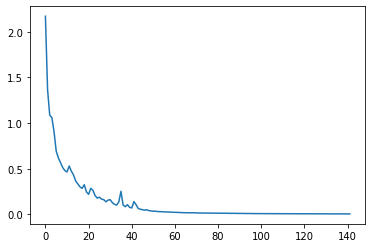

In [11]:
#get training and test error for the best NN model from CV

best_mlp = MLPClassifier(hidden_layer_sizes=NNclasf.best_params_['hidden_layer_sizes'], 
                       batch_size=NNclasf_bestlayer.best_params_['batch_size'],
                       max_iter=300, alpha=1e-4, solver='sgd', 
                       tol=1e-4, random_state=ID,
                       learning_rate_init=max(score))
best_mlp.fit(X_train, y_train)
training_error = 1. - best_mlp.score(X_train,y_train)
test_error = 1. - best_mlp.score(X_test,y_test)

print ('\nRESULTS FOR BEST NN\n')

print ("Best NN training error: %f" % training_error)
print ("Best NN test error: %f" % test_error)

plt.plot(best_mlp.loss_curve_)
plt.show()

## More data 
Now let's do the same but using 5000 (or less if it takes too long on your machine) data points for training. Use the same NN architecture as before, but you can try more if you like and have a powerful computer !!

In [12]:
X = X[permutation]
y = y[permutation]

m_training = 5000

X_train, X_test = X[:m_training], X[m_training:]
y_train, y_test = y[:m_training], y[m_training:]

labels, freqs = np.unique(y_train, return_counts=True)
print("Labels in training dataset: ", labels)
print("Frequencies in training dataset: ", freqs)

Labels in training dataset:  [0 1 2 3 4 5 6 7 8 9]
Frequencies in training dataset:  [521 543 477 466 489 493 496 491 521 503]


## TO DO 5

Now train the NNs with the added data points using the optimum parameters found above. Eventually, feel free to try different architectures if you like. We suggest that you use 'verbose=True' so have an idea of how long it takes to run 1 iteration (eventually reduce also the number of iterations to 50).

In [13]:
# use best architecture and params from before

best_mlp_large = MLPClassifier(hidden_layer_sizes=NNclasf.best_params_['hidden_layer_sizes'], 
                       batch_size=NNclasf_bestlayer.best_params_['batch_size'],
                       max_iter=300, alpha=1e-4, solver='sgd', 
                       tol=1e-4, random_state=ID, # verbose=True,
                       learning_rate_init=.1)
best_mlp_large.fit(X_train, y_train)
training_error = 1. - best_mlp.score(X_train,y_train)
test_error = 1. - best_mlp.score(X_test,y_test)

print ('\nRESULTS FOR NN large set\n')

print ("NN training error: %f" % training_error)
print ("NN test error: %f" % test_error)



RESULTS FOR NN large set

NN training error: 0.211600
NN test error: 0.218127


## QUESTION 3
Compare the train and test errors you got with a large number of samples with the best one you obtained with only 600 data points. Comment about the results you obtained.

## [ANSWER TO QUESTION 3]

The training error in the small dataset is 0 this can be interpreted as an overfit over the data but in the larger data set the value is 0.2 which is a little bigger then expected but it means that the model used to classify is corrected.

The test set error is almost equal in the two cases as i would expect meaning that the wodel work well for both big and small data sets, in particular in the big data set test and training score are very similar so we can say that the model works well even if i would expect a training error a little smaller.

### TO DO 7

Plot an example that was missclassified by NN with m=600 training data points and it is now instead correctly classified by NN with m=5000 training data points.

INPUT:


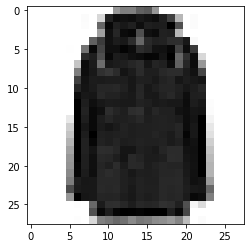

LABEL: 4
small set prediction : 2
large set prediction : 4
  correct prediction : 4


In [14]:
NN_prediction = best_mlp.predict(X_test)
large_NN_prediction = best_mlp_large.predict(X_test)

for i in range(len(NN_prediction)):
    if ((NN_prediction[i]!=large_NN_prediction[i]) and (large_NN_prediction[i]==y_test[i])):
        plot_input(X_test, y_test, i)
        print("small set prediction :", NN_prediction[i])
        print("large set prediction :", large_NN_prediction[i])
        print("  correct prediction :", y_test[i])
        break


### TO DO 8

Let's plot the weigths of the multi-layer perceptron classifier, for the best NN we get with 600 data points and with 5000 data points. The code is already provided, just fix variable names (e.g., replace mlp ,  mlp_large with your estimators) in order to have it working with your implementation



Weights with 600 data points:


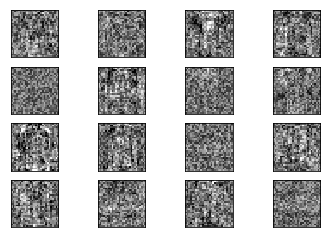

Weights with 5000 data points:


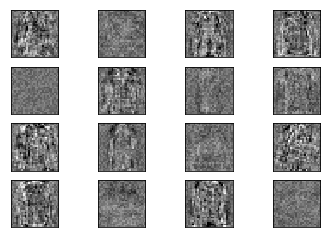

In [15]:
# The code is already provided, fix variable names in order to have it working with your implementation

print("Weights with 600 data points:")

fig, axes = plt.subplots(4, 4)
vmin, vmax = best_mlp.coefs_[0].min(), best_mlp.coefs_[0].max()
for coef, ax in zip(best_mlp.coefs_[0].T, axes.ravel()):
    ax.matshow(coef.reshape(28, 28), cmap=plt.cm.gray, vmin=.5 * vmin,
               vmax=.5 * vmax)
    ax.set_xticks(())
    ax.set_yticks(())

plt.show()

print("Weights with 5000 data points:")

fig, axes = plt.subplots(4, 4)
vmin, vmax = best_mlp_large.coefs_[0].min(), best_mlp_large.coefs_[0].max()
for coef, ax in zip(best_mlp_large.coefs_[0].T, axes.ravel()):
    ax.matshow(coef.reshape(28, 28), cmap=plt.cm.gray, vmin=.5 * vmin,
               vmax=.5 * vmax)
    ax.set_xticks(())
    ax.set_yticks(())
plt.show()

## QUESTION 4

Describe what do you observe by looking at the weights

## [ANSWER TO QUESTION 4]

Comparing the weights from the 2 datasets is visible that for the bigger data set the images are "smoother" is the sense that the coefficients are more uniformally determinated.
In the small data set the images have a worst "resolution" meaning that the values have big flutctuations is their estimation.
This is similar to the SVM case where the coefficient have high fluctuating value without regularization and more "uniform" values with it.

### TO DO 9

Report the best SVM model and its parameters, you found in the last notebook (or check out the solution on the moodle webpage of the course). Fit it on a few data points and compute its training and test scores.

In [16]:
m_training = 5000

X_train, X_test = X[:m_training], X[m_training:2*m_training]
y_train, y_test = y[:m_training], y[m_training:2*m_training]

# use best parameters found in the SVM notebook, create SVM and perform fitting

best_SVM = SVC(C=50,gamma=0.005,kernel='rbf')
best_SVM.fit(X_train,y_train)

print ('RESULTS FOR SVM')
SVM_training_error = 1. - best_SVM.score(X_train,y_train)
SVM_test_error = 1. - best_SVM.score(X_test,y_test)

print("Training score SVM:")
print(SVM_training_error)

print("Test score SVM:")
print(SVM_test_error)

RESULTS FOR SVM
Training score SVM:
0.0021999999999999797
Test score SVM:
0.13839999999999997


## QUESTION 5
Compare the results of SVM and of NN. Which one would you prefer? 

## [ANSWER TO QUESTION 5]

The scores obtained from the SVM are clearly better then the ones obtained with the NN so for this particular dataset i would prefer the SVM hoiwever for very big dataset the NN may be a better choiuce since the time needed for the SVM to converge i pretty bigger than the time necessary for the NN